In [2]:
import numpy as np
import pandas as pd 


In [3]:
def load_data(path):
    data = pd.read_csv(path)
    return data

In [4]:
data = load_data('https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
def data_cleaning(data):
    print(data.isna().sum())
    data = data.dropna()
    return data

In [6]:
def preprocessing(data):
    data['education'] = np.where(data['education']== 'basic.9y','basic',data['education'])
    data['education'] = np.where(data['education']== 'basic.6y','basic',data['education'])
    data['education'] = np.where(data['education']=='basic.4y','basic',data['education'])

    cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    for var in cat_vars:
        cat_list = pd.get_dummies(data[var],prefix=var)
        data1 = data.join(cat_list)
        data = data1
    data_vars = data.columns.values.tolist()
    to_keep = [i for i in data_vars if i not in cat_vars]
    final_data = data[to_keep]

    final_data.columns = final_data.columns.str.replace('.','_')
    final_data.columns = final_data.columns.str.replace(' ','_')

    return final_data

In [7]:
def train_test_split(final_data):
    from sklearn.model_selection import train_test_split
    x = final_data.drop('y',axis=1)
    y = final_data['y'].values
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,stratify=y,random_state=42)
    return x_train,x_test,y_train,y_test

In [8]:
def over_sampling_target(x_train,y_train):
    from imblearn.over_sampling import SMOTE
    columns = x_train.columns
    os = SMOTE(random_state=0)
    os_data_x ,os_data_y = os.fit_resample(x_train,y_train)
    os_data_x = pd.DataFrame(data=os_data_x,columns=columns)
    os_data_y = pd.DataFrame(data= os_data_y,columns=['y'])

    x_train = os_data_x
    y_train = os_data_y['y']
    
    return x_train, y_train
    

In [9]:
def training_basic_classifier(x_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=101)
    model.fit(x_train,y_train)
    return model

In [10]:
def predict_on_test_data(model,x_test):
    y_pred = model.predict(x_test)
    return y_pred

In [11]:
def predict_prob(model,x_test):
    y_pred_proba = model.predict_proba(x_test)
    return y_pred_proba

In [12]:
def get_metrics(y_true,y_pred,y_pred_proba):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    entropy = log_loss(y_true,y_pred)
    return {'accuracy':acc, 'precision':prec, 'recall':recall,'entropy':entropy} 

In [13]:
def plot_roc_curve(model,x_data,y_data):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, roc_auc_score
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression

    # Example data - replace this with your own data and model

    # Get predicted probabilities
    y_probs = model.predict_proba(x_data)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_data, y_probs)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # from sklearn import metrics 
    # import matplotlib.pyplot as plt
    # metrics.plot_roc_curve(x_data,y_data)
    plt.savefig('roc_auc_cure.png')

In [14]:
def create_confusion_matrix(y_true,y_pred):
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.metrics import confusion_matrix
    import seaborn as sns  # Seaborn is a nice library for creating heatmap visualizations

    # Example data - replace this with your actual data
    # y_true = [1, 0, 1, 2, 0, 1, 2, 2, 0, 1]
    # y_pred = [1, 0, 1, 2, 0, 2, 1, 2, 0, 1]

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    plt.savefig('confusion_matrix.png')


In [15]:
def hyperparameter_tuning(x_train,y_train):
    n_estimators =[5,21,51,101]
    max_features = ['auto','sqrt']
    max_depth = [int(x) for x in np.linspace(10,120,num=12)]
    min_samples_split = [2,6,10]
    min_samples_leaf= [1,3,4]
    bootstrap = [True , False]
    from sklearn.ensemble import RandomForestClassifier
    estimator = RandomForestClassifier()
    random_grid = {n_estimators:'n_estimators',
                   max_features: 'max_features',
                   max_depth:'max_depth',
                   min_samples_split: 'min_samples_split',
                   min_samples_leaf: 'min_samples_leaf',
                   bootstrap: 'bootstrap'}
    from sklearn.model_selection import RandomizedSearchCV
    model_random = RandomizedSearchCV(estimator=estimator,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,random_state=35,n_jobs=-1 )
    model_random.fit(x_train,y_train)
    best_params = model_random.best_params_
    n_estimators = best_params['n_estimators']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    bootstrap = best_params['bootstrap']
    
    model_tuned = RandomForestClassifier(n_estimators='n_estimators',max_features='max_features',max_depth='max_depth',
                                         min_samples_split='min_samples_split',min_samples_leaf='min_samples_leaf',
                                         bootstrap='bootstrap')
    model_tuned.fit(x_train,y_train)
    return model_tuned,best_params



In [16]:
data = load_data('https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/banking.csv')

In [17]:
cleaned_data = data_cleaning(data)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [18]:
final_data = preprocessing(cleaned_data)

In [19]:
final_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin_', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

In [20]:
x_train,x_test,y_train,y_test = train_test_split(final_data)

In [21]:
x_train,y_train = over_sampling_target(x_train,y_train)

In [45]:
x_train.iloc[0].values


array([26, 106, 1, 999, 0, 1.1, 93.994, -36.4, 4.856, 5191.0, False, True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, True, False, False, True, False, False, False,
       False, False, True, False, True, False, False, True, False, False,
       False, True, False, False, False, False, False, False, True, False,
       False, False, False, False, False, True, False, False, True, False],
      dtype=object)

In [22]:
model = training_basic_classifier(x_train,y_train)

In [23]:
y_pred = predict_on_test_data(model,x_test)

In [24]:
y_pred_proba = predict_prob(model,x_test)

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
run_metrics = get_metrics(y_test,y_pred,y_pred_proba)

In [27]:
run_metrics

{'accuracy': 0.9122764425022255,
 'precision': 0.6305084745762712,
 'recall': 0.5344827586206896,
 'entropy': 3.1618775005100748}

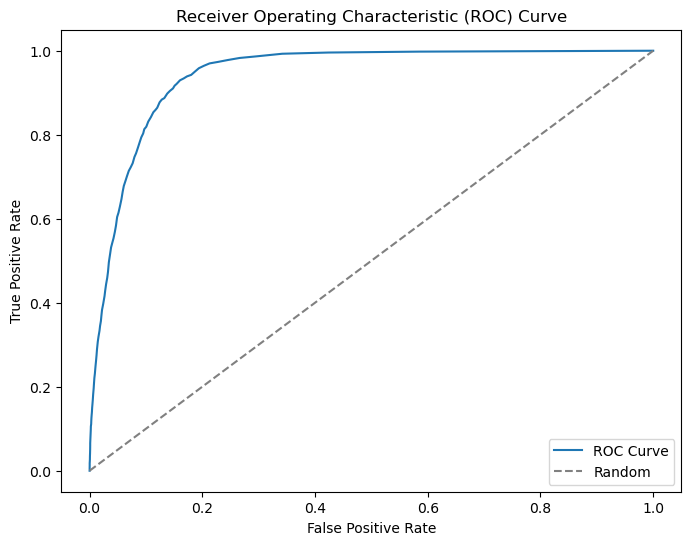

<Figure size 640x480 with 0 Axes>

In [33]:
plot_roc_curve(model,x_test,y_test)

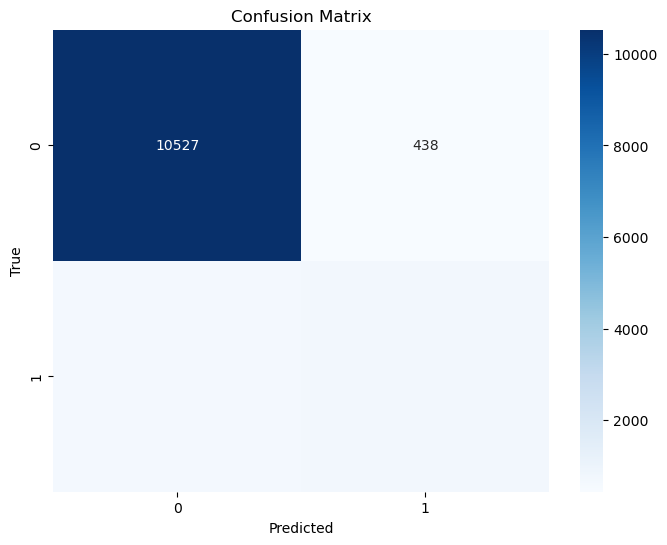

<Figure size 640x480 with 0 Axes>

In [36]:
create_confusion_matrix(y_test,y_pred)

In [32]:

def create_experiment(experiment_name,run_name,run_metrics,model,confusion_matrix_path=None,roc_auc_plot_path=None,run_params = None):
    import mlflow
    mlflow.set_tracking_uri('http://localhost:5000')
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name):
        if not run_params==None:
            for param in run_params:
                mlflow.log_param(param,run_params[param])
        for metric in run_metrics:
            mlflow.log_metric(metric,run_metrics[metric])
        
        if not confusion_matrix_path==None:
            mlflow.log_artifact(confusion_matrix_path,'confusion_matrix')
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path,'roc_auc_plot')
        mlflow.set_tag('tag1','classifier')    
        mlflow.sklearn.log_model(model,'model',registered_model_name='model1')    


In [33]:
from datetime import datetime
time = datetime.now().strftime("%d-%m-%Y")
print(time)
experiment_name = 'experiment2'
run_name = 'runnning_1'
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png','roc_auc_cure.png')

08-12-2023


Successfully registered model 'model1'.
2023/12/08 04:36:50 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model1, version 1
Created version '1' of model 'model1'.


In [34]:
import mlflow 
client = mlflow.tracking.MlflowClient()
client.create_registered_model('basic_model1')

<RegisteredModel: aliases={}, creation_timestamp=1702043383821, description='', last_updated_timestamp=1702043383821, latest_versions=[], name='basic_model1', tags={}>

In [35]:
result = client.create_model_version(name='basic_model1',source='runs:/e84dae2f2cf74c2caecdea63bfd2c69a/artifacts/model',
                                     run_id='e84dae2f2cf74c2caecdea63bfd2c69a')

2023/12/08 05:54:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: basic_model1, version 1


model loading from registry


In [36]:
import mlflow.pyfunc
model_name = 'model1'
model_version = 1
model = mlflow.pyfunc.load_model(model_uri=f'models:/{model_name}/{model_version}')
ypred = model.predict(x_test)
print(y_pred)

sklearn_model = mlflow.sklearn.load_model(model_uri=f'models:/{model_name}/{model_version}')
y_prob = sklearn_model.predict_proba(x_test)

[0 0 0 ... 0 0 0]


model transitioning from stage to stage


In [37]:
print(y_prob)

[[0.99009901 0.00990099]
 [0.93069307 0.06930693]
 [0.98019802 0.01980198]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.9009901  0.0990099 ]]


In [38]:
client.transition_model_version_stage(name='basic_model1',version=1,stage='Production')

<ModelVersion: aliases=[], creation_timestamp=1702043682289, current_stage='Production', description='', last_updated_timestamp=1702044866949, name='basic_model1', run_id='e84dae2f2cf74c2caecdea63bfd2c69a', run_link='', source='runs:/e84dae2f2cf74c2caecdea63bfd2c69a/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>

In [39]:
mlflow.set_tracking_uri('http://localhost:5000')

In [56]:
import requests
inference_request = {'dataframe_records':slt}
endpoint = 'http://localhost:1234/invocations'
response = requests.post(endpoint,json=inference_request)
print(response.text)

{"predictions": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [55]:
slt = x_test.values.tolist()

In [51]:
columns =x_test.select_dtypes(include=['bool_'])

In [52]:
for i in columns:
    x_test[i] = x_test[i].astype('float64')